## Install packages to be used

In [1]:
!pip3 install treeinterpreter pandas matplotlib seaborn

## Import Libraries and packages used

In [1]:
import pandas as pd
import numpy as np

import heapq

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

from sklearn.tree import DecisionTreeClassifier
from treeinterpreter import treeinterpreter as ti

from sklearn.metrics import accuracy_score, precision_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark', {"axes.facecolor": ".9"})
sns.set(rc={"figure.figsize":(12.7, 9.27)})

## Import data used

I have always loved the field of health care. i chose this dataset because its a dataset that i'd love to internalize and see it from another perspective and compare it with the normal perspective. The normal perspective is that, some hospitals may be better than other hospitals due to staffing and equipment. But staff motivation is something we cant measure but we may be able to deduce it from this dataset. The perspective i am looking at this dataset is the perspective of a data scientist. Having spent a couple of years in an hospital, i can also look at it from another perspective.

This allows me to ask various questions
- Does location of an hopital affect the quality of the hospital?
- How well is the hospital equipped for emergencies?
and some other questions

In [2]:
df = pd.read_csv("train_data.csv")

In [3]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


## Visualization

### Average bed grade given to different types of admission

<AxesSubplot:xlabel='Type of Admission'>

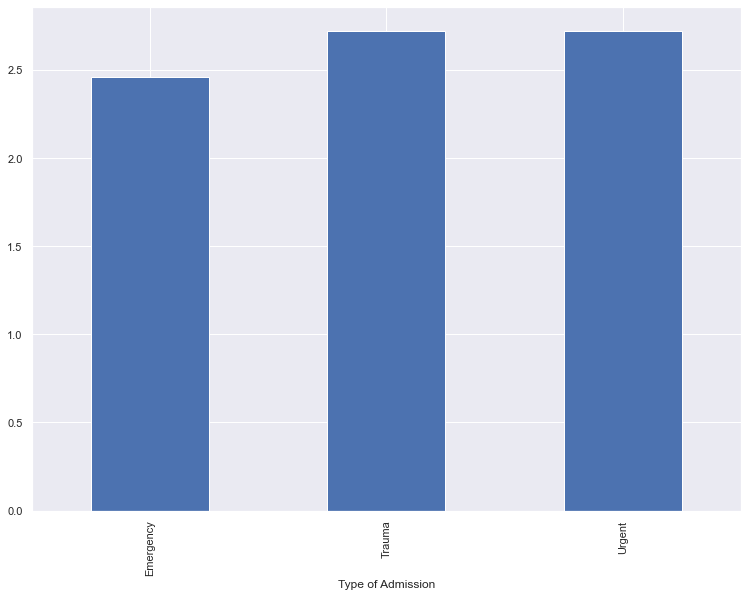

In [4]:
df.groupby("Type of Admission")["Bed Grade"].mean().plot(kind='bar')

From what we can see, Urgent and Trauma admissions were given special care

### Different hospital types and their Admission deposit required

<AxesSubplot:xlabel='Hospital_type_code'>

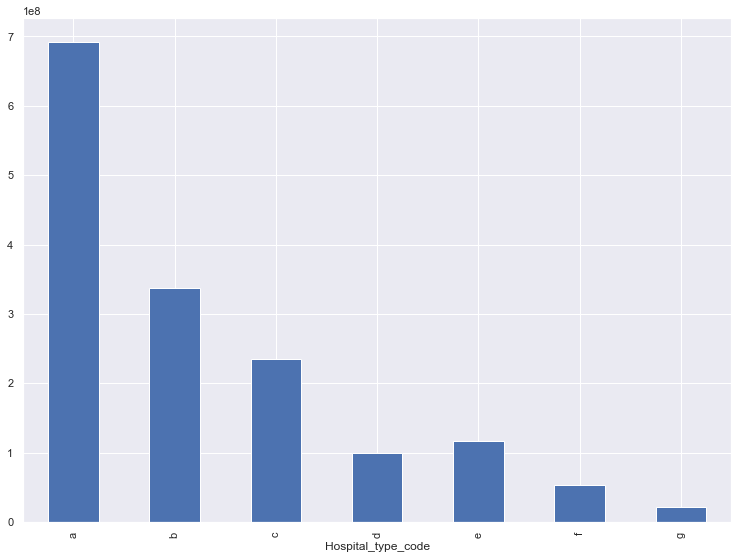

In [5]:
df.groupby("Hospital_type_code")["Admission_Deposit"].sum().plot(kind='bar')

we can see that hospital type a and g were the highest and lowest respectively in terms of admission deposit required

<AxesSubplot:>

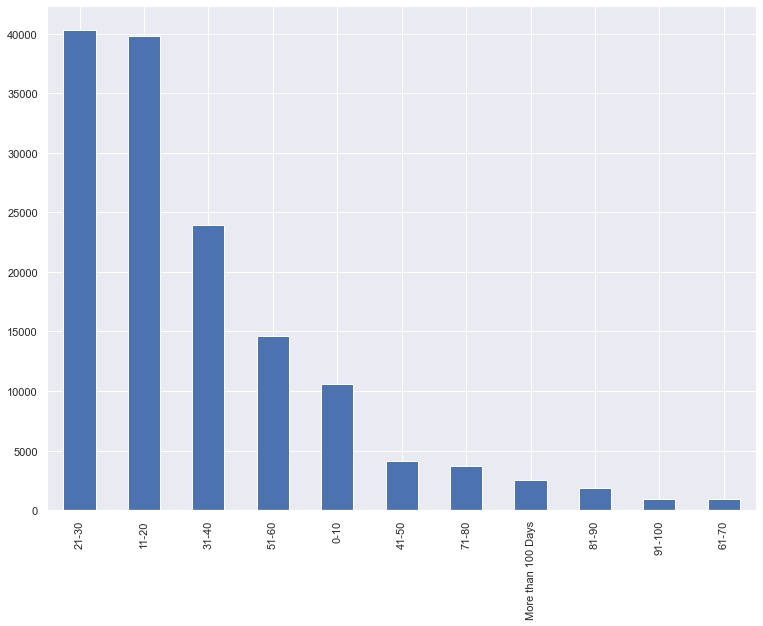

In [6]:
df[df['Hospital_type_code'] == 'a']['Stay'].value_counts().plot(kind='bar')

In Hospital type 'a', most patients stayed within 21-30 days or 11-20 days

<AxesSubplot:>

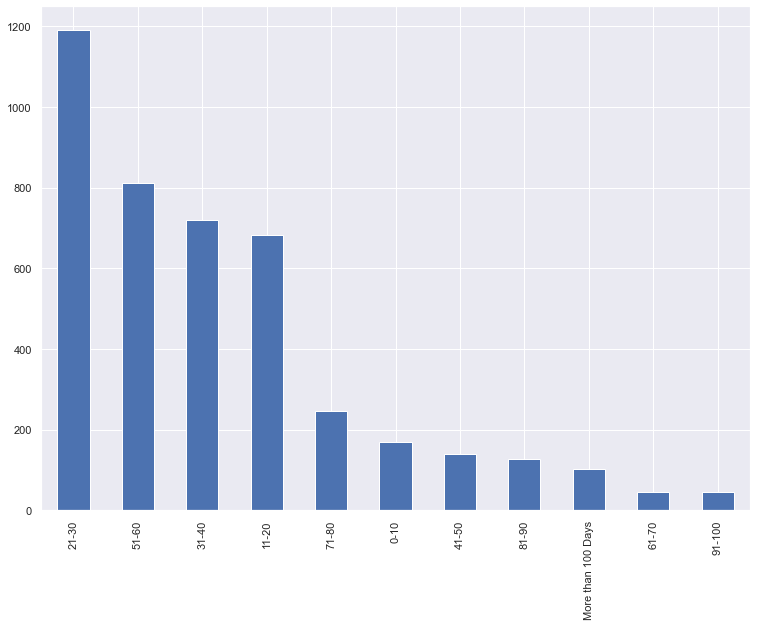

In [7]:
df[df['Hospital_type_code'] == 'g']['Stay'].value_counts().plot(kind='bar')

In Hospital type 'g', most patients stayed within 21-30 days or 51-60 days

<AxesSubplot:>

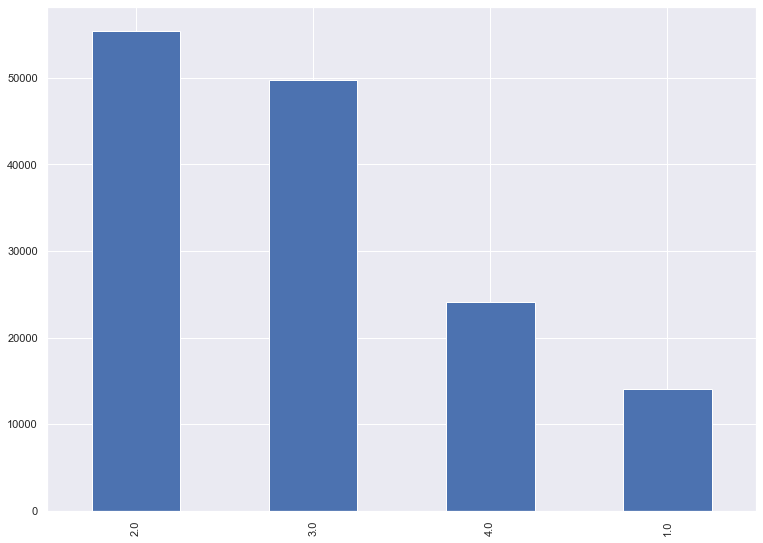

In [8]:
df[df['Hospital_type_code'] == 'a']['Bed Grade'].value_counts().plot(kind='bar')

<AxesSubplot:>

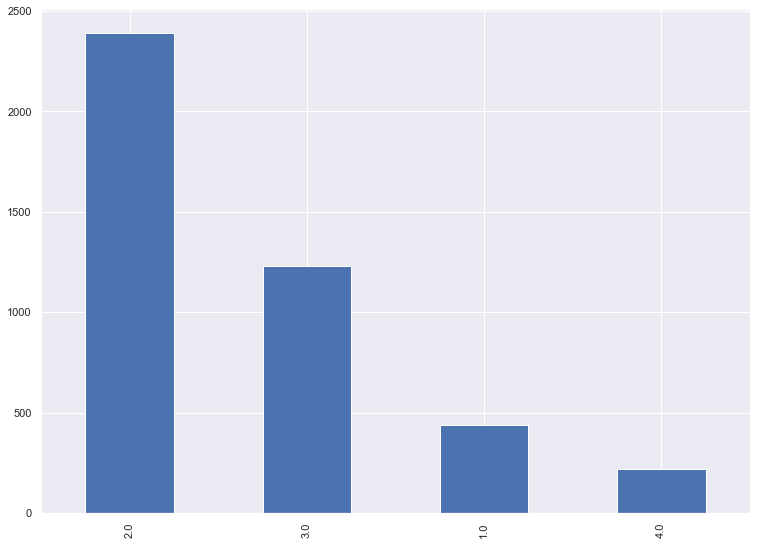

In [9]:
df[df['Hospital_type_code'] == 'g']['Bed Grade'].value_counts().plot(kind='bar')

From the last two visualizations, we can see that both Hospital type 'a' has more quality beds than type 'g'.

Looking at this, we can say type 'a' is more equipped than type 'g'

### Average admission deposit paid across different types of admission 

<AxesSubplot:xlabel='Type of Admission'>

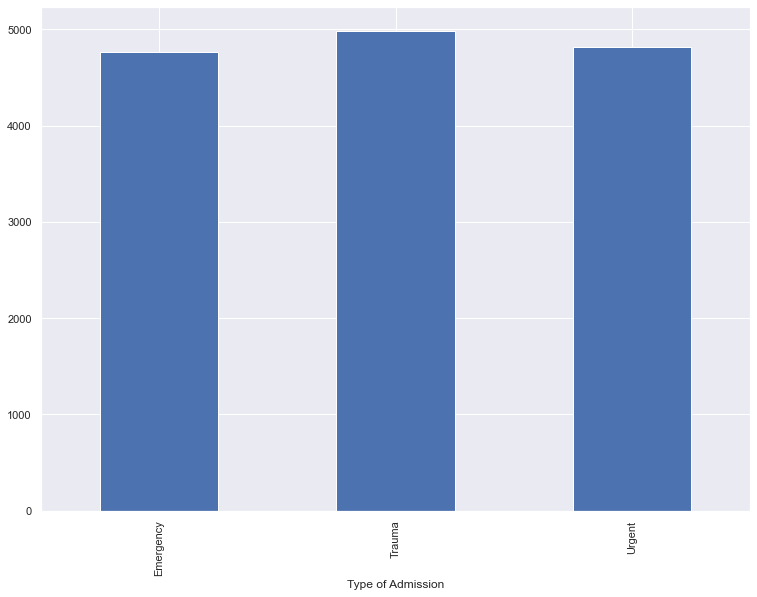

In [10]:
df.groupby("Type of Admission")["Admission_Deposit"].mean().plot(kind='bar')

### Count of the admission types

<AxesSubplot:xlabel='Type of Admission'>

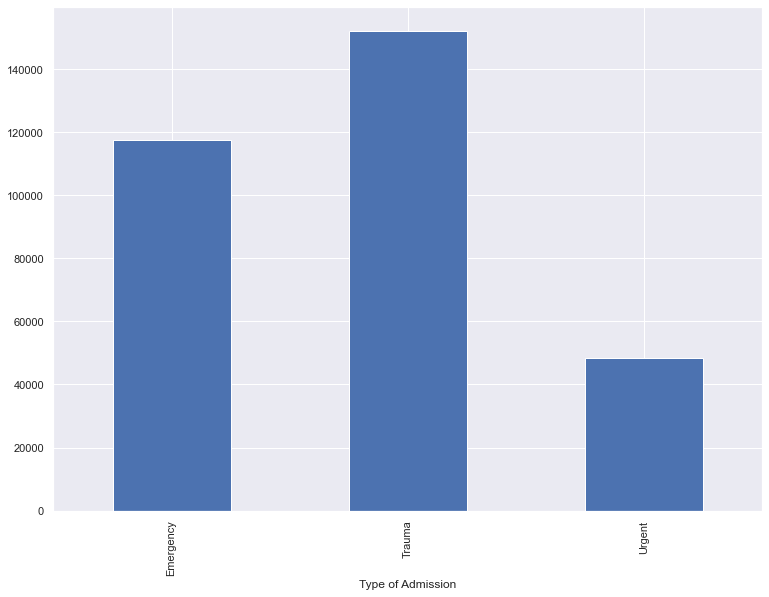

In [11]:
df["count"] = 1
df.groupby("Type of Admission")["count"].sum().plot(kind='bar')

In [12]:
del df['count']

## Handling missing values

In [13]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

This shows that there are missing values in City_Code_Patient column and Bed Grade column

- The City_Code_Patient is not a column we can formulate with mean or some other metrics, its like an ID.

- The Bed grade is a value given to the grade of equipment in the hospital. I wont advise to formulate this either

So, I am dropping all rows with missing values

In [14]:
df = df.dropna(subset=['City_Code_Patient', 'Bed Grade'])

check again for missing values

In [15]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## Normalization

we have a lot of categorical columns in this dataset, so we'll dynamically normalize it

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  object 
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  object 
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  object 
 7   Ward_Type                          313793 non-null  object 
 8   Ward_Facility_Code                 313793 non-null  object 
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  3137

In [17]:
cat_list = df.select_dtypes('object').columns.to_list()

df1 = df.copy()
for i in cat_list:
    x = i.lower()
    a = LabelEncoder()
    b = a.fit_transform(df[i])
    df1[i] = b
    
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  int64  
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  int64  
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  int64  
 7   Ward_Type                          313793 non-null  int64  
 8   Ward_Facility_Code                 313793 non-null  int64  
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  3137

In [18]:
#x has all the data points in df and all the columns except the last column which is the target column
#y has all the data points and just the last column of the dataset df.
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [19]:
X.values

array([[1.00000e+00, 8.00000e+00, 2.00000e+00, ..., 2.00000e+00,
        5.00000e+00, 4.91100e+03],
       [2.00000e+00, 2.00000e+00, 2.00000e+00, ..., 2.00000e+00,
        5.00000e+00, 5.95400e+03],
       [3.00000e+00, 1.00000e+01, 4.00000e+00, ..., 2.00000e+00,
        5.00000e+00, 4.74500e+03],
       ...,
       [3.18436e+05, 7.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        7.00000e+00, 4.23500e+03],
       [3.18437e+05, 1.10000e+01, 1.00000e+00, ..., 5.00000e+00,
        1.00000e+00, 3.76100e+03],
       [3.18438e+05, 1.90000e+01, 0.00000e+00, ..., 2.00000e+00,
        1.00000e+00, 4.75200e+03]])

In [20]:
y.values

array([0, 4, 3, ..., 1, 1, 0])

## Feature importance per class

In [21]:
X_train, X_test, y_train, y_test = train_test_split( 
    X.values, y.values, test_size=0.33, random_state=0)

# fit the model on the training set
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
asd = []
ade = []
for test_sample in range(len(X_test)):
    prediction, bias, contributions = ti.predict(model, X_test[test_sample].reshape(1,17))
    print("Class Prediction", prediction)
    print("Bias (trainset prior)", bias)
    a = prediction.tolist()[0].index(max(prediction.tolist()[0]))

    d= []
    # now extract contributions for each instance
    for c, feature in zip(contributions[0], df1.columns):
        print(feature, c)
        d.append(c[a])

    print('\n')
    asd.append(d)
    ade.append(a)
    if len(list(np.unique(ade))) == 11:
        break

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 3.69655406e-02  3.33706390e-01 -4.15329937e-01  1.10535919e-01
 -2.90450798e-03 -7.39768203e-03 -5.89187911e-02 -2.16606826e-04
  1.13147500e-03  3.61103182e-03 -1.18283204e-03]
Hospital_code [ 0.04166667  0.20833333  0.         -0.25        0.          0.
  0.          0.          0.          0.          0.        ]
Hospital_type_code [-0.01178101  0.1046431   0.14830215 -0.07623008 -0.10810811 -0.03603604
 -0.01039501  0.          0.00762301 -0.01801802  0.        ]
City_Code_Hospital [-0.01069022 -0.03228732  0.01511305  0.01153224  0.006544    0.00508139
  0.00163125  0.00206603  0.00016586  0.00050314  0.00034057]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00467432  0.00988482  0.00264267  0.00317579 -0.01198521 -0.000369

Class Prediction [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 3.34595696e-02  8.19788589e-02 -4.77705952e-01  3.68661635e-01
 -1.14391223e-03 -2.71216959e-03 -1.35199124e-03 -3.18447129e-04
 -9.61390618e-04 -1.87987785e-04  2.81787324e-04]
Hospital_code [ 1.07650189e-02  2.59516944e-02  2.65425275e-05 -1.21005933e-02
 -1.16396819e-02 -5.80242113e-03 -2.15186397e-03 -2.16586857e-03
 -8.32112848e-04 -9.25493600e-04 -1.12522046e-03]
Hospital_type_code [-0.14837265  0.11318916 -0.03718168  0.05891462  0.00581108  0.00470496
  0.0004906   0.00171255  0.          0.00054851  0.00018284]
City_Code_Hospital [ 0.03395332 -0.04827972 -0.00713745  0.01436785  0.00578138 -0.00081133
 -0.00090849  0.00396971 -0.00044813  0.00092303 -0.00141015]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0

Class Prediction [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.00102018  0.10789777  0.00762726 -0.14817296  0.17908517 -0.02877198
 -0.11535128  0.00137519  0.00064382 -0.00077258 -0.00254023]
Hospital_code [ 0.00140363 -0.04404725 -0.0421815   0.02877845  0.0465134  -0.00684471
  0.0136151   0.00051628  0.00128378  0.00052607  0.00043676]
Hospital_type_code [ 0.          0.0139716  -0.0634448  -0.0231333   0.06871278  0.00687128
  0.01053596 -0.01351351  0.          0.          0.        ]
City_Code_Hospital [-0.01069022 -0.03228732  0.01511305  0.01153224  0.006544    0.00508139
  0.00163125  0.00206603  0.00016586  0.00050314  0.00034057]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [-0.0095393  -0.0001626  -0.02487805  0.0202168   0.00856369 

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.          0.01848212 -0.13298044  0.09276996  0.19060546 -0.1846693
  0.01916991 -0.0066958   0.11320418 -0.0021645  -0.1077216 ]
Hospital_code [ 0.          0.00728244  0.01978395 -0.00206336  0.01092366  0.0754946
 -0.00206336 -0.03010074  0.00218473  0.         -0.08144192]
Hospital_type_code [ 0.         -0.00014625 -0.00597286 -0.01629812 -0.00428805  0.03432783
 -0.00235755 -0.01010296 -0.01246051 -0.0016614   0.01895987]
City_Code_Hospital [ 0.00000000e+00 -1.85534857e-04 -6.94464016e-03 -2.56296442e-01
 -2.50622364e-01 -2.72055163e-02 -7.28048173e-04  2.07376302e-03
  5.18985618e-01  1.03101016e-03  1.98921549e-02]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0.

Class Prediction [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.04014211  0.01742172 -0.07031381 -0.02262297 -0.02164782  0.03213246
  0.01187757  0.00730217  0.00408187  0.00513652 -0.00350981]
Hospital_code [-0.33333333  0.         -0.22222222  0.66666667  0.          0.
  0.          0.         -0.11111111  0.          0.        ]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [-0.01069022 -0.03228732  0.01511305  0.01153224  0.006544    0.00508139
  0.00163125  0.00206603  0.00016586  0.00050314  0.00034057]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [-0.00960322 -0.07164928 -0.05714216  0.04324897 -0.00272721  0.05932318
  0.00566163  0.02010225  0.00190837  0.00556113  0.00531635]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.03702005  0.09384726

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-9.87108127e-03 -1.04809548e-01 -3.16492374e-01  3.18082257e-01
  4.47578131e-02 -5.41125107e-02  3.99288894e-02 -1.74302180e-03
  1.90472006e-04 -5.21493089e-03  8.92840348e-02]
Hospital_code [ 0.          0.08333333  0.08333333  0.08333333 -0.33333333  0.
  0.          0.          0.          0.          0.08333333]
Hospital_type_code [-0.00026222  0.01802329  0.02681132 -0.02419651 -0.01297885 -0.00269531
 -0.00476361 -0.0004357   0.00015449 -0.00025745  0.00060056]
City_Code_Hospital [ 0.00084847 -0.02299317 -0.01120087  0.0175383   0.00662062  0.00543037
 -0.0009358   0.00180638  0.00079301  0.00045159  0.00164111]
Hospital_region_code [-5.04048053e-03 -1.73137619e-02 -3.15061294e-03  1.39222089e-02
  5.44686792e-03  2.89709071e-03  2.09405543e-03  4.05020445e-04
  1.51808

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-6.33557768e-03 -1.27253648e-01  1.26304806e-01  5.77514356e-03
  6.21415759e-04  1.58272459e-03  2.03811059e-05  4.63427527e-05
 -2.42077625e-04 -7.72575628e-04  2.53065398e-04]
Hospital_code [-0.00039377  0.01235683  0.01183342 -0.00807339 -0.01304868  0.00192019
 -0.00381952 -0.00014483 -0.00036015 -0.00014758 -0.00012253]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [-0.00267526  0.0023106   0.02627463 -0.02842383 -0.01144514  0.01432828
 -0.00344489  0.00206603  0.00016586  0.00050314  0.00034057]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00801573  0.06367211  0.00539423 -0.04738859  0.00831821 -0.0380117
  0.          0.          0.          0.          0.        ]
Department [0. 0. 0. 0. 0. 0

Class Prediction [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.         -0.00889923 -0.00037211 -0.00939687  0.00186503  0.01875339
  0.         -0.00298135  0.00732113  0.00046626 -0.00675624]
Hospital_code [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.25000000e-01
  1.38888889e-02  8.33333333e-02  0.00000000e+00  2.77777778e-02
  2.77555756e-17  0.00000000e+00  0.00000000e+00]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [ 0.          0.         -0.03049645  0.04184397  0.01205674  0.09574468
  0.          0.00283688  0.02695035 -0.0212766  -0.12765957]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.          0.00976642 -0.0052958   0.03007293  0.0007399  -0.00445659
 -0.00087321  0.00037511 -0.02524426 -0.00200259 -0.00308192]
Department [ 0.          0.

Class Prediction [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.          0.39182859 -0.07361106 -0.67064704  0.00488563  0.18503359
  0.         -0.01554519  0.          0.          0.17805548]
Hospital_code [-2.34085480e-03  5.41070102e-02 -4.24797816e-02 -4.61966174e-03
 -2.29956577e-03 -2.25772804e-03 -9.01865807e-04 -6.16820611e-05
 -2.26883905e-04 -3.19292686e-04  1.40030624e-03]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.         -0.04468719  0.00662032  0.03707382 -0.01754386  0.01456471
  0.          0.00264813  0.          0.          0.00132406]
Department [ 0.          0.03226319  0.00810553  0.0348061  -0.015178   -0.03488557
  0.          0.00540369 -0.01652893 -0.008

Class Prediction [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.03571429  0.11038961 -0.01623377 -0.01623377 -0.01623377  0.
  0.          0.          0.          0.         -0.02597403]
Hospital_code [ 0.          0.03571429 -0.0452381   0.0047619   0.00238095  0.
  0.          0.          0.          0.          0.00238095]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [-0.1572973   0.10774775  0.03279279 -0.01009009  0.00594595 -0.00702703
 -0.00900901  0.00198198  0.00198198  0.01099099  0.02198198]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 9.85983430e-03 -2.59415990e-03  8.10674968e-04 -5.28965417e-03
 -9.52543087e-05 -1.72268431e-04 -2.42391815e-03 -9.03902589e-04
  2.31042366e-04  1.54028244e-04  4.23577671e-04]
Department [-0.02656546  0.0455408  -0.0474

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.0301458  -0.37980003  0.56687903 -0.14551678 -0.02076383 -0.02817528
 -0.00115603 -0.01378774 -0.00162552 -0.00390465 -0.00229497]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [ 1.13600147e-02  1.56563496e-02 -2.24832740e-02 -3.97492163e-03
 -2.92296353e-03  2.43181509e-03  2.42221560e-04  2.90929250e-04
 -7.33989385e-04  5.99975249e-05  7.38207678e-05]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [ 0.00045721 -0.02111081  0.01385061  0.00475635 -0.00108746 -0.00052434
  0.00195266  0.00046318  0.00035503  0.00017751  0.00071006]
Ward_Type [-0.09090909  0.          0.09090909  0.          0.          0.
  0.  

Class Prediction [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.02979602  0.01500386  0.03500681 -0.04801283  0.00535023  0.01562866
 -0.00015667  0.00714397  0.00044994  0.00011426 -0.0007322 ]
Hospital_code [-2.67328405e-02 -6.44460090e-02 -6.59132287e-05  3.00494809e-02
  2.89048968e-02  1.44091896e-02  5.34373759e-03  5.37851530e-03
  2.06639117e-03  2.29828419e-03  2.79426718e-03]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [ 0.          0.02745098 -0.0745098   0.02352941  0.01176471  0.00392157
  0.00784314  0.          0.          0.          0.        ]
Ward_Type [-0.01040467 -0.05791543 -0.01106757  0.09032687 -0.00332255  0.0005362

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-7.07791427e-03 -4.49310891e-02  1.34436513e-01 -6.62582718e-02
  4.11165503e-03 -1.67681354e-02 -7.18419758e-03  1.00271021e-02
  3.24895471e-05 -6.27551377e-03 -1.12637462e-04]
Hospital_code [-0.00333235  0.00318424 -0.02517773  0.01875987  0.00328298  0.00187599
  0.000469    0.000469    0.          0.000469    0.        ]
Hospital_type_code [-0.00026222  0.01802329  0.02681132 -0.02419651 -0.01297885 -0.00269531
 -0.00476361 -0.0004357   0.00015449 -0.00025745  0.00060056]
City_Code_Hospital [ 0.01040722  0.01225461 -0.04707901  0.01356291  0.01040722 -0.0027941
 -0.00068373  0.0026166   0.          0.0013083   0.        ]
Hospital_region_code [-5.04048053e-03 -1.73137619e-02 -3.15061294e-03  1.39222089e-02
  5.44686792e-03  2.89709071e-03  2.09405543e-03  4.05020445e-04
  

Class Prediction [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 4.09616778e-05  3.48174261e-04  1.22885033e-04  2.92875996e-03
  1.02404194e-04  7.78163074e-02  6.14425167e-05  8.26913870e-04
  2.45770067e-04  5.73463489e-04 -8.30670824e-02]
Hospital_code [-0.00185169 -0.03591483 -0.01359949  0.01946636 -0.00056576  0.06745821
 -0.00577305 -0.0417079   0.00329569 -0.01003319  0.01922566]
Hospital_type_code [ 0.00064158  0.00037728  0.00192474 -0.02011694  0.00033491  0.02161395
 -0.0015757   0.00264097 -0.00122667 -0.00117018 -0.00344395]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 7.80464657e-05  8.19487890e-04 -9.95872903e-04  6.37951811e-03
 -9.95872903e-04  5.69270921e-03  1.95116164e-04 -4.13646268e-04
 -1.83565287e-03 -4.74522512e-03

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.          0.          0.         -0.15625     0.         -0.09375
  0.          0.12443182  0.         -0.13522727  0.26079545]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [ 0.          0.          0.00287468  0.0202255   0.00091288  0.00763557
 -0.00253612  0.05163835  0.00968503  0.0363793  -0.12681519]
Available Extra Rooms in Hospital [ 0.          0.          0.          0.          0.          0.
  0.         -0.21818182  0.          0.07272727  0.14545455]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-0.03223976 -0.08172906 -0.11975717  0.05779914 -0.01766461  0.11215786
 -0.00396944  0.07806128  0.02563935 -0.03619658  0.01

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 6.52246395e-03  9.41554833e-03 -3.14488344e-02  8.05236031e-03
  4.79460143e-03  1.94840377e-03  9.89830791e-05  9.89830791e-05
  0.00000000e+00  0.00000000e+00  5.17490484e-04]
Hospital_code [-0.02777778  0.          0.19444444 -0.16666667  0.          0.
  0.          0.          0.          0.          0.        ]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [ 5.35684218e-03 -2.09254911e-02  1.01569852e-02 -1.24327295e-03
  4.37266601e-03  2.27313369e-03  3.72655566e-04  3.72002929e-05
 -7.85774608e-04 -1.67727636e-04  5.52783300e-04]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.002502    0.00072449  0.062723

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 1.02385030e-02 -2.84303631e-01  3.88350893e-01  5.97459676e-02
  7.30599681e-03 -1.63958172e-01 -1.18624538e-02 -5.16897786e-04
 -3.41524318e-03  1.59419794e-04 -1.74438281e-03]
Hospital_code [-0.00528961 -0.05430495  0.01215467  0.0221779   0.01654651  0.00366015
  0.00376855  0.00068822 -0.00015362 -0.00112549  0.00187768]
Hospital_type_code [ 0.00287493 -0.02701548 -0.00708567  0.01592043  0.0047359   0.0066895
  0.00087367  0.00211559  0.00019135  0.00032282  0.00037695]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [-2.09229579e-01  1.14678541e-01  2.69689480e-01 -1.86381793e-01
  8.81357009e-03  2.80221327e-03  1.65949489e-03  2.13337691e-04
  2.20373296e-04 -1.07440492e-03 

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-4.66183575e-03  2.48596423e-03 -1.22946860e-02 -3.23729599e-01
  1.18357488e-03 -6.19688602e-01  5.62606084e-03  1.48028463e-02
  1.69082126e-04  9.29973887e-01  6.13330722e-03]
Hospital_code [-0.005      -0.01348837 -0.05337209  0.09918605 -0.01174419  0.02825581
  0.00162791 -0.02034884 -0.005      -0.01837209 -0.00174419]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [-0.01312297 -0.0055525  -0.03916101 -0.02446034  0.00849997  0.0909191
 -0.00552804  0.00431725 -0.00023237 -0.00692228 -0.0087568 ]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.01445148  0.00517614  0.07056853 -0.0731476  -0.00256899  0.01408596
  0.01004345 -0.0465288   0.00043366  0.00616394  0.00132225]
Department [ 0.          0. 

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_code [-7.16036087e-02  1.24213543e-02  5.37029060e-02 -2.04718608e-03
 -4.43342488e-03  3.22941926e-03 -1.36059826e-03  3.03740604e-03
  6.39539050e-03 -3.27303524e-05  6.91072158e-04]
Hospital_type_code [-0.09199854  0.05368408  0.01602728 -0.01579588 -0.01164292  0.02980149
 -0.00511509  0.00590671  0.00846426  0.00220436  0.00846426]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.0368319  -0.0342944  -0.01528201  0.00452257  0.0002737   0.00133162
 -0.00026322  0.00185304  0.00132324 -0.00052812  0.00423168]
Ward_Facility_Code [-0.03689632 -0.0

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.00000000e+00 -1.77200770e-02 -5.83485186e-04 -2.56460999e-02
 -2.54755992e-01 -1.97808719e-01 -5.10204082e-03  4.93665446e-01
  4.88087447e-03  2.72404472e-03  3.46048629e-04]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [ 0.          0.05038361  0.00821322  0.14019987 -0.01231812 -0.09319918
 -0.01318347 -0.03376772 -0.00722667 -0.01887742 -0.02022411]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.         -0.00849343  0.00293225  0.04165824  0.00586451 -0.07148635
  0.          0.02649141 -0.0057634   0.00293225  0.00586451]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.02579796  0.06125962  0.07674663 -0.02882764  0.00909367 -0.0818127

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 7.04300783e-05  4.23485111e-01  1.38803066e-01 -4.88744529e-01
 -3.67597186e-02  9.90422977e-05 -3.69688079e-02  8.80375979e-06
  2.20093995e-06  2.20093995e-06  2.20093995e-06]
Hospital_code [-0.00665899 -0.0204145  -0.0343454   0.02971255  0.01463     0.00657142
  0.00821564  0.00148225  0.00030074  0.00036044  0.00014585]
Hospital_type_code [ 0.00021903 -0.01505443 -0.02239486  0.02021078  0.01084092  0.00225133
  0.00397893  0.00036393 -0.00012904  0.00021504 -0.00050163]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00621424 -0.28118395  0.14770453  0.18191106 -0.0470507  -0.01676859
  0.00917341  0.          0.          0.          0.        ]
Department [-7.69063339e-04

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.02650728  0.32744283 -0.27650728  0.02962578 -0.02027027 -0.02027027
 -0.00675676 -0.00675676  0.          0.          0.        ]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [-0.08256372  0.11863371  0.08703427 -0.07330572 -0.02830594 -0.01825569
 -0.00161845  0.00340667 -0.00167504  0.         -0.00335008]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-2.32034967e-02  2.62431360e-03  4.64370225e-02  3.81000164e-03
  3.45011425e-03 -2.51789504e-02 -1.01752499e-03 -4.90490934e-03
 -1.38064628e-03 -6.17675784e-04 -1.82484618e-05]
Ward_Facility_Code [ 3.62335714e-02 

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 2.54280872e-02 -3.91457298e-02  1.55108239e-01 -9.02401743e-02
 -3.30636060e-02 -1.89537218e-02  4.66873623e-03 -2.58406159e-03
  3.24895471e-05 -1.13762106e-03 -1.12637462e-04]
Hospital_code [ 0.01975844  0.06257817 -0.07287758 -0.04827236  0.00177846  0.
  0.03703487  0.          0.          0.          0.        ]
Hospital_type_code [-0.00026222  0.01802329  0.02681132 -0.02419651 -0.01297885 -0.00269531
 -0.00476361 -0.0004357   0.00015449 -0.00025745  0.00060056]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [-5.04048053e-03 -1.73137619e-02 -3.15061294e-03  1.39222089e-02
  5.44686792e-03  2.89709071e-03  2.09405543e-03  4.05020445e-04
  1.51808883e-04  7.01337467e-05  5.17669378e-04]
Available Extra Rooms in Hospital [-0.00306427 -0.00957586 

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 9.42731628e-03 -6.41530431e-02 -1.51600945e-01  2.22477304e-01
  1.49672746e-02 -3.39013271e-02  2.60433407e-03  5.96954184e-05
  1.93598751e-05  0.00000000e+00  1.00030962e-04]
Hospital_code [ 0.00113029 -0.00646227 -0.00165503  0.01309796  0.00339101 -0.00215593
 -0.00393034 -0.00355334  0.00016117 -0.00092017  0.00089664]
Hospital_type_code [ 0.00021903 -0.01505443 -0.02239486  0.02021078  0.01084092  0.00225133
  0.00397893  0.00036393 -0.00012904  0.00021504 -0.00050163]
City_Code_Hospital [ 2.60270755e-03  6.97344481e-03  4.80350440e-03 -9.42242513e-03
 -5.10751805e-03 -7.94719863e-05  6.86056351e-04 -3.43416656e-04
  2.94135145e-05 -2.59948872e-04  1.17654058e-04]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00309562  0.0

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.          0.00444667 -0.03075492  0.12725181 -0.00780234 -0.14506976
 -0.01063694  0.04333834 -0.00825356  0.01585135  0.01162936]
Hospital_code [ 0.          0.00944405  0.01110715 -0.07947256  0.00011879  0.00671181
  0.00374198  0.02423378  0.00380138  0.00742457  0.01288905]
Hospital_type_code [ 0.          0.          0.         -0.89473684  0.          0.
  0.          0.89473684  0.          0.          0.        ]
City_Code_Hospital [ 0.         -0.00637199 -0.00111306 -0.01973094 -0.0005952   0.00641838
  0.0007374   0.01050312  0.00210061  0.0039715   0.00408017]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [ 0.          0.          0.          0.04473684  0.         -0.05
  

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.04421302  0.17633162 -0.15123053  0.02052338 -0.00848783  0.00505455
  0.          0.          0.          0.          0.00202182]
Hospital_code [ 0.04438821  0.05343863 -0.0125872  -0.04176025  0.00381491 -0.03006142
 -0.00452817 -0.00897107 -0.00248007 -0.0019169   0.00066333]
Hospital_type_code [ 0.00287493 -0.02701548 -0.00708567  0.01592043  0.0047359   0.0066895
  0.00087367  0.00211559  0.00019135  0.00032282  0.00037695]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00623886  0.0013369   0.0271836  -0.00356506 -0.01827094 -0.01381462
  0.          0.          0.          0.          0.00089127]
Department [-0.05525847 -0.09447415  0.18360071 -0.01604278  0.00356506 -

Class Prediction [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.01145833  0.02938988 -0.04605655  0.00758929  0.00342262  0.01026786
  0.00171131  0.00171131  0.00171131  0.          0.00171131]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [ 0.00120192  0.00540865  0.00612981 -0.01418269  0.00024038  0.00072115
  0.00012019  0.00012019  0.00012019  0.          0.00012019]
City_Code_Hospital [ 0.00455466 -0.04200405  0.03046559  0.00020243  0.00222672  0.00010121
  0.00111336  0.00111336  0.00111336  0.          0.00111336]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [-0.04330322  0.08965043 -0.02248625 -0.01237235 -0.00176748 -0.01364886
  0.0028476   0.0028476  -0.00088374 -0.00373134  0.0028476 ]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.01946432  0.

Class Prediction [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-5.87038135e-02  3.48907495e-01 -1.96850425e-01 -1.03861720e-01
 -6.00153132e-02  4.90759402e-02 -1.23636633e-02  3.77899625e-02
  1.70914839e-04  0.00000000e+00 -4.14937759e-03]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [-0.0060033  -0.07166442  0.00902535  0.03673759  0.01274962  0.01114445
  0.00153439  0.00402479  0.00115957  0.00059782  0.00069413]
City_Code_Hospital [ 0.001945    0.00856896 -0.01815236  0.00147255 -0.00117627  0.00400422
  0.00060689  0.00166895  0.00045517  0.00015172  0.00045517]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00744048  0.03125    -0.04761905 -0.01041667  0.00744048  0.00595238
  0.0014881   0.00297619  0.0014881   0.          0.        ]
Department [0. 0. 0. 0. 0. 

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.          0.          0.          0.          0.         -0.07789385
  0.02801619 -0.01125541  0.03779409  0.          0.02333898]
Hospital_code [ 0.00000000e+00 -1.10667137e-03 -1.56696831e-04 -8.91702903e-03
 -3.32001410e-03 -3.16478630e-02  4.20633055e-03  2.12030399e-03
  7.08973476e-01  3.79500137e-03 -6.73946837e-01]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [ 0.          0.00070562  0.0009032  -0.00590184  0.00060401 -0.02730203
  0.00014959 -0.01316696  0.02926649 -0.00126166  0.01600357]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-3.22397650e-02 -8.02817982e-02 -9.90499044e-02  3.57426120e-02
 -1.05

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_code [-2.34085480e-03  5.41070102e-02 -4.24797816e-02 -4.61966174e-03
 -2.29956577e-03 -2.25772804e-03 -9.01865807e-04 -6.16820611e-05
 -2.26883905e-04 -3.19292686e-04  1.40030624e-03]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [ 0.01702786  0.39427245 -0.11919505 -0.12383901 -0.01470588 -0.01470588
  0.         -0.07678019 -0.0620743   0.          0.        ]
Ward_Type [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Facility_Code [ 0.01949198  0.125332   -0.0662205  -0.03478739 -0.02388661 -0.01177184
 -0.00492589 -0.00328238 -0.00042844 -0.0010

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.00966027 -0.06102611  0.05744727  0.00764177  0.00200121 -0.00924533
 -0.00066563 -0.00271438  0.         -0.00102438 -0.00207469]
Hospital_code [-2.34250115e-04 -3.47294740e-02  1.30188269e-02  1.18481593e-02
  8.48646612e-03 -2.40828771e-04  3.45337798e-04  6.81265620e-04
  2.26505621e-05  5.05640490e-04  2.96206064e-04]
Hospital_type_code [ 1.51625074e-02 -1.89912126e-02 -2.23530311e-02  1.62776529e-02
  5.32258675e-03 -1.54809811e-03  1.66101683e-03  3.66644551e-03
  4.05454267e-04 -2.18426541e-05  4.18520854e-04]
City_Code_Hospital [-0.01069022 -0.03228732  0.01511305  0.01153224  0.006544    0.00508139
  0.00163125  0.00206603  0.00016586  0.00050314  0.00034057]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00401782  0.0

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.00419405 -0.01003113 -0.00739364  0.02477516  0.00354549 -0.00514528
 -0.00125389 -0.0003459  -0.00168627  0.00043238  0.00129713]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [-0.01069022 -0.03228732  0.01511305  0.01153224  0.006544    0.00508139
  0.00163125  0.00206603  0.00016586  0.00050314  0.00034057]
Hospital_region_code [-0.01090868  0.01938732  0.04000798 -0.03418527 -0.00565786  0.01046297
 -0.00517145 -0.01511951  0.00135544 -0.00268443  0.00251347]
Available Extra Rooms in Hospital [-0.00960322 -0.07164928 -0.05714216  0.04324897 -0.00272721  0.05932318
  0.00566163  0.02010225  0.00190837  0.00556113  0.00531635]
Department [-0.00255102  0.00510204 -0.03316327  0.03061224 -0.00510204 

Class Prediction [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.00147038  0.05273103  0.01781178  0.0188536   0.00195219 -0.08618652
  0.00349763  0.00700244 -0.00057371 -0.008492   -0.00806682]
Hospital_code [ 0.         -0.02251407 -0.00547217 -0.09803002  0.0134459   0.06957473
  0.0134459   0.01907442  0.00125078  0.01407129 -0.00484678]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-3.22397650e-02 -8.17290588e-02 -1.18796202e-01  4.33599498e-02
 -5.02242416e-02  2.08703293e-01  1.45477911e-04 -8.30909025e-02
  3.42042997e-02  3.77537444e-02  4.19134045e-02]
Ward_Facility_Code [ 0.00110368 -0.0

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.04756446  0.24862709 -0.00221115 -0.03338643 -0.0053176  -0.0331417
  0.00202683 -0.04498501 -0.00178118 -0.08402567  0.00175928]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [ 0.00315391 -0.01807158  0.00730673 -0.08873058  0.00912675  0.03180054
  0.00465864  0.02759057  0.00227679  0.01107819  0.00981006]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.00414079  0.04968944 -0.08695652  0.00414079  0.          0.01656315
  0.          0.00414079  0.          0.00828157  0.        ]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-0.03223976 -0.08172906 -0.1187962   0.04335995 -0.01162775  0.11045768
  0.00014548  0.03269857  0.02016921  0.0096

Class Prediction [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 9.32327239e-01 -9.04961972e-02 -5.95223392e-01 -2.02855961e-01
 -3.68253368e-03 -4.01226351e-02 -1.25606315e-04  5.96954184e-05
  1.93598751e-05  0.00000000e+00  1.00030962e-04]
Hospital_code [ 0.00113029 -0.00646227 -0.00165503  0.01309796  0.00339101 -0.00215593
 -0.00393034 -0.00355334  0.00016117 -0.00092017  0.00089664]
Hospital_type_code [ 0.00021903 -0.01505443 -0.02239486  0.02021078  0.01084092  0.00225133
  0.00397893  0.00036393 -0.00012904  0.00021504 -0.00050163]
City_Code_Hospital [ 2.60270755e-03  6.97344481e-03  4.80350440e-03 -9.42242513e-03
 -5.10751805e-03 -7.94719863e-05  6.86056351e-04 -3.43416656e-04
  2.94135145e-05 -2.59948872e-04  1.17654058e-04]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0

Class Prediction [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.03430572  0.21535776 -0.59510411  0.16025829  0.19942929 -0.01288476
  0.00190208 -0.00461343  0.00143258 -0.00084655  0.00076313]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [ 1.13600147e-02  1.56563496e-02 -2.24832740e-02 -3.97492163e-03
 -2.92296353e-03  2.43181509e-03  2.42221560e-04  2.90929250e-04
 -7.33989385e-04  5.99975249e-05  7.38207678e-05]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [-0.0012987  -0.09415584  0.15324675 -0.02012987 -0.00064935  0.
 -0.01883117  0.         -0.01818182  0.          0.        ]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [ 0.00045721 -0.02111081  0.01385061  0.00475635 -0.00108746 -0.00052434
  0.00195266  0.00046318  0.00035503  0.00017751  0

Class Prediction [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [-0.01214196  0.04249841  0.01000768 -0.01520129 -0.01036035 -0.00788846
 -0.00151333 -0.00328756 -0.00016029 -0.00037678 -0.00157606]
City_Code_Hospital [ 0.0828362  -0.02786234 -0.10809114  0.03580741  0.00300329  0.01280494
  0.          0.00150164  0.          0.          0.        ]
Hospital_region_code [-9.34444918e-03  5.03802624e-03  3.07260693e-03  1.36086744e-03
 -1.38015077e-04 -2.56464799e-04  7.15281206e-05  3.00707180e-05
  8.29148051e-05  5.33023747e-05  2.96124304e-05]
Available Extra Rooms in Hospital [-0.1400209  -0.06792059 -0.00940439  0.12748171  0.01880878  0.0522466
  0.          0.01880878  0.          0.          0.        ]
Department [0. 0. 0. 0. 0. 0

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.00147038  0.05273103  0.01781178  0.0188536   0.00195219 -0.08618652
  0.00349763  0.00700244 -0.00057371 -0.008492   -0.00806682]
Hospital_code [ 0.    0.    0.    0.    0.    0.   -0.25  0.25  0.    0.    0.  ]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-0.03223976 -0.08172906 -0.1187962   0.04335995 -0.01162775  0.11045768
  0.00014548  0.03269857  0.02016921  0.00968357  0.02787832]
Ward_Facility_Code [ 0.00110368 -0.00075856  0.00450101  0.02489574 -0.00214265 -0.04094945
  0.00387367  0.00323375  0.0033434  -0.00319241  0.0060

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.07692308 -0.10576923  0.43131868 -0.15384615  0.         -0.09478022
  0.          0.          0.          0.          0.        ]
Hospital_code [-0.01095225 -0.01755748  0.0165198   0.00700823  0.00851336 -0.00601667
  0.00247183  0.00052893  0.00051993 -0.0009169  -0.00011877]
Hospital_type_code [ 0.00810779  0.05147745 -0.0819156   0.01173414  0.00996876 -0.00325294
  0.00087367  0.00211559  0.00019135  0.00032282  0.00037695]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.00326775  0.00767138 -0.03044431 -0.00394235 -0.01512559  0.02748715
 -0.00266284  0.00733085  0.00136295  0.000

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.00406977  0.03124587 -0.04010327  0.00192988  0.00520715  0.00845691
  0.00244895 -0.00148078 -0.00176763 -0.00071342 -0.00115388]
Hospital_code [ 0.00205651  0.04691667  0.01632507 -0.03301158 -0.01774033 -0.00512405
 -0.00364006 -0.00344398 -0.00034974 -0.00148767 -0.00050084]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [ 0.03804348  0.07336957 -0.02445652 -0.08695652  0.          0.
  0.          0.          0.          0.          0.        ]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.00084414 -0.00561946  0.01807633 -0.00135049 -0.00259088 -0.00666206
  0.0010059  -0.00280429 -0.00038673  0.00012574 -0

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.         -0.01065378  0.00371633  0.02371652  0.00024181 -0.00483729
 -0.0161335   0.00720234  0.00105496 -0.00474888  0.00044148]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [ 0.         -0.13333333  0.          0.          0.          0.13333333
  0.          0.          0.          0.          0.        ]
City_Code_Hospital [-0.00321958  0.02537186 -0.01148945 -0.00502858 -0.01075442  0.03431255
 -0.00018222 -0.01356234  0.00062267 -0.00689093 -0.00917957]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [ 0.          0.00614844 -0.00933245 -0.01108915  0.          0.02602108
  0.00076856 -0.01405358  0.          0.00076856  0.00076856]
Ward_Type [-0.03223976 -0.

Class Prediction [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.23076923 -0.07692308  0.         -0.15384615  0.          0.
  0.          0.          0.          0.          0.        ]
Hospital_code [-2.34085480e-03  5.41070102e-02 -4.24797816e-02 -4.61966174e-03
 -2.29956577e-03 -2.25772804e-03 -9.01865807e-04 -6.16820611e-05
 -2.26883905e-04 -3.19292686e-04  1.40030624e-03]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.0168108  -0.0507221  -0.0522455   0.03782988  0.00073064  0.02510175
 -0.00108313  0.00620301  0.00280236  0.00056047  0.01401182]
Ward_Facility_Code [ 0.01949198  0.125332   

Class Prediction [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.00906803 -0.89041279  0.86928178  0.00544914  0.00538674 -0.00293255
  0.          0.          0.00415965  0.          0.        ]
Hospital_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_type_code [-0.0041145   0.03866362  0.01014076 -0.02278477 -0.00677786 -0.00957378
 -0.00125037 -0.00302776 -0.00027386 -0.00046201 -0.00053948]
City_Code_Hospital [-1.08032318e-02 -1.43945402e-02  1.25662623e-02  8.04557051e-03
  2.90404846e-03  1.31147788e-03  7.21122765e-04 -1.73292821e-04
  4.83546538e-05  2.60616760e-04 -4.86388522e-04]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [-0.00044686  0.11579388 -0.06108085 -0.01871247 -0.01804217 -0.01524927
 -0.0017316  -0.0025974   0.00206675  0.   

Class Prediction [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-3.08584115e-02  2.99698899e-01 -7.00636212e-02 -1.63799186e-01
 -3.54954438e-02  2.58881935e-04  1.29440967e-04  1.29440967e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00]
Hospital_code [-0.0086782   0.07061317  0.01506338 -0.03546876 -0.01453351 -0.01920816
 -0.00195689 -0.00133017  0.00059491 -0.00279634 -0.00229943]
Hospital_type_code [ 0.00287493 -0.02701548 -0.00708567  0.01592043  0.0047359   0.0066895
  0.00087367  0.00211559  0.00019135  0.00032282  0.00037695]
City_Code_Hospital [ 0.01922644  0.03432714 -0.01310454 -0.01203713 -0.01031829 -0.00904681
 -0.00452341 -0.00321792 -0.00130548  0.          0.        ]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [-0.00791952 -0.0

Class Prediction [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-9.90299602e-02 -3.25048633e-01 -3.27660068e-01  7.25668247e-01
 -2.50734709e-01  2.99178609e-01 -1.77566687e-02 -2.32141165e-03
 -2.32141165e-03  0.00000000e+00  2.60061866e-05]
Hospital_code [ 0.01683502  0.04208754  0.02188552 -0.07744108  0.01683502  0.00841751
 -0.02861953  0.          0.          0.          0.        ]
Hospital_type_code [ 0.00021903 -0.01505443 -0.02239486  0.02021078  0.01084092  0.00225133
  0.00397893  0.00036393 -0.00012904  0.00021504 -0.00050163]
City_Code_Hospital [ 0.01669999  0.03664374 -0.00255078 -0.01890796 -0.02704673 -0.00243292
  0.00168664 -0.00359792  0.00071036 -0.00191479  0.00071036]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [-0.00223739 -0.01755327  0.03088311 -0.00851303  0.00019275 -

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [-0.00559699 -0.33794679  0.08785512  0.21291684 -0.04368759  0.07696995
  0.00082823  0.04999641 -0.02016049 -0.00676618 -0.01440851]
Hospital_code [ 0.02307692 -0.07692308 -0.13076923  0.11538462  0.          0.04615385
  0.          0.02307692  0.          0.          0.        ]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [ 0.   0.   0.  -0.5  0.   0.   0.   0.5  0.   0.   0. ]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-0.00221627 -0.07079922 -0.07470702  0.05012487  0.00843902  0.05477084
  0.00715715  0.01288315  0.00610331  0.00346075  0.00478341]
Ward_Facility_Code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Bed G

Class Prediction [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.         -0.02933026 -0.00398587  0.01618175  0.00278552 -0.56934204
 -0.00398587  0.60426501  0.01700847 -0.03835615  0.00475945]
Hospital_code [ 0.          0.          0.         -0.11591837  0.00707483  0.08816327
  0.          0.00571429  0.01414966  0.          0.00081633]
Hospital_type_code [ 0.         -0.02251117 -0.00628489 -0.06254102  0.00084515  0.02996068
  0.00028172  0.02825005  0.01121347  0.01426298  0.00652304]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [ 0.          0.          0.         -0.06293706  0.          0.12587413
  0.          0.01398601  0.          0.         -0.07692308]
Department [ 0.         -0.00304384  0.00038875 -0.02531844  0.001555   

Class Prediction [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.04327869 -0.08098361  0.02885246  0.0052459   0.00360656  0.
  0.          0.          0.          0.          0.        ]
Hospital_code [-2.34085480e-03  5.41070102e-02 -4.24797816e-02 -4.61966174e-03
 -2.29956577e-03 -2.25772804e-03 -9.01865807e-04 -6.16820611e-05
 -2.26883905e-04 -3.19292686e-04  1.40030624e-03]
Hospital_type_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [ 0.34333333 -0.21        0.00666667 -0.12       -0.02        0.
  0.          0.          0.          0.          0.        ]
Ward_Facility_Code [ 0.01949198  0.125332   -0.06622

Class Prediction [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Bias (trainset prior) [[0.0744907  0.24512345 0.27457537 0.17325831 0.03689575 0.10968841
  0.00852831 0.03242945 0.01519685 0.00865673 0.02115667]]
case_id [ 0.02647485 -0.16016408 -0.00455259  0.07148782 -0.01797458  0.03013539
  0.02799385  0.          0.          0.          0.02659936]
Hospital_code [-0.01051228 -0.00923487  0.02733065  0.00219269  0.00733773 -0.0114041
 -0.00112234 -0.00368912 -0.00030157  0.00047565 -0.00107244]
Hospital_type_code [ 0.00287493 -0.02701548 -0.00708567  0.01592043  0.0047359   0.0066895
  0.00087367  0.00211559  0.00019135  0.00032282  0.00037695]
City_Code_Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Hospital_region_code [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Available Extra Rooms in Hospital [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Department [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Ward_Type [-0.00133986 -0.00314547  0.01248297  0.00161647  0.00620189 -0.01127046
  0.00109183 -0.00300584 -0.00055885 -0.00033

In [23]:
asd

[[0.33370638980510603,
  0.20833333333333337,
  0.10464310464310467,
  -0.032287316468773086,
  0.0,
  0.009884822192350012,
  0.0,
  0.09384726052205972,
  0.0,
  -0.06030837263863653,
  0.0,
  -0.008444615788437582,
  -0.02921044615570037,
  -0.08609252339155876,
  -0.040077725152608185,
  -0.027955976828701185,
  0.2888386123680241],
 [0.2124253285543608,
  0.027330650244197008,
  0.3262476643795505,
  0.0,
  0.0,
  0.0,
  0.0,
  0.01248297349234373,
  0.039837976116276486,
  -0.04786435498558106,
  0.006428345720212114,
  0.05600633990827625,
  0.014602003041377709,
  0.0,
  -0.20144986464429743,
  0.033333333333333326,
  0.24604423657210556],
 [0.33333333333333337,
  0.0,
  0.009025352456062286,
  0.26145510835913316,
  0.0,
  0.0,
  0.0035733846936905622,
  0.0,
  -0.0038248752654488904,
  -0.04786435498558106,
  0.39999999999999997,
  -0.048016535023899964,
  0.014602003041377709,
  -0.18899521531100483,
  -0.02064178383621662,
  0.0,
  0.012778214270709298],
 [-0.02729876544241

In [24]:
ade

[1,
 2,
 2,
 3,
 3,
 1,
 0,
 2,
 4,
 0,
 3,
 0,
 8,
 1,
 2,
 1,
 3,
 4,
 2,
 2,
 10,
 1,
 2,
 3,
 2,
 7,
 5,
 2,
 5,
 7,
 3,
 4,
 5,
 5,
 3,
 2,
 3,
 2,
 3,
 5,
 2,
 2,
 10,
 3,
 4,
 0,
 7,
 2,
 2,
 5,
 2,
 2,
 5,
 2,
 2,
 1,
 10,
 0,
 7,
 5,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 5,
 9,
 3,
 0,
 2,
 2,
 2,
 1,
 1,
 7,
 5,
 0,
 2,
 2,
 3,
 2,
 10,
 1,
 2,
 8,
 4,
 2,
 3,
 2,
 2,
 1,
 1,
 0,
 5,
 7,
 3,
 4,
 7,
 1,
 1,
 3,
 0,
 3,
 1,
 1,
 1,
 5,
 3,
 1,
 2,
 8,
 2,
 1,
 2,
 1,
 5,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 5,
 2,
 3,
 3,
 1,
 1,
 5,
 1,
 0,
 2,
 3,
 1,
 4,
 0,
 1,
 0,
 3,
 3,
 3,
 1,
 7,
 2,
 2,
 7,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 3,
 3,
 5,
 2,
 5,
 1,
 2,
 1,
 3,
 0,
 3,
 3,
 3,
 3,
 5,
 7,
 1,
 2,
 0,
 7,
 3,
 2,
 3,
 0,
 1,
 2,
 10,
 6]

In [25]:
bt = list(np.unique(ade))

In [50]:
adr = []
for i in bt:
    print(i)
    a = ade.index(i)
    b = asd[a]
    adr.append(b)

0
1
2
3
4
5
6
7
8
9
10


In [27]:
dfe = pd.DataFrame(adr, columns=df1.columns[:-1])

In [28]:
dfe

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.038746,-0.088330,0.000000,0.756174,-0.019716,0.000000,0.000000,0.000537,0.000000,0.001134,0.169964,0.016427,-0.035202,0.000000,0.010903,0.013104,0.061768
1,0.333706,0.208333,0.104643,-0.032287,0.000000,0.009885,0.000000,0.093847,0.000000,-0.060308,0.000000,-0.008445,-0.029210,-0.086093,-0.040078,-0.027956,0.288839
2,0.212425,0.027331,0.326248,0.000000,0.000000,0.000000,0.000000,0.012483,0.039838,-0.047864,0.006428,0.056006,0.014602,0.000000,-0.201450,0.033333,0.246044
3,-0.027299,-0.012101,0.012832,0.014368,0.000000,0.000000,0.139552,-0.006156,0.012287,0.005745,0.767561,-0.038615,-0.026374,0.000000,-0.031395,0.003845,0.012492
4,0.179085,0.046513,0.068713,0.006544,0.000000,0.000000,0.008564,0.013352,0.000000,0.008690,0.018707,0.000000,0.001411,0.037821,-0.001668,0.000000,0.575372
5,0.108470,0.000000,0.000000,-0.034186,0.000000,0.000000,0.000000,0.110458,0.000000,0.215604,0.329695,0.068812,-0.085797,0.024753,0.135773,0.000000,0.016730
6,0.027994,-0.001122,0.000874,0.000000,0.000000,0.000000,0.000000,0.001092,-0.000923,0.006342,0.183570,0.005511,0.000138,0.000000,-0.000788,0.750000,0.018785
7,0.011814,-0.002786,0.623810,-0.005277,0.000000,0.000000,0.000000,-0.001975,0.000000,0.003483,0.335525,0.000000,-0.007776,0.000000,0.010773,0.008374,-0.008395
8,0.113204,0.002185,-0.012461,0.518986,0.000000,0.000000,0.000000,0.156259,0.000000,-0.008181,0.000000,0.103226,0.000000,0.000000,0.112625,-0.014069,0.013030
9,0.929974,-0.018372,0.000000,-0.006922,0.000000,0.006164,0.001323,0.007267,0.000000,0.000274,0.002201,0.000000,0.000642,0.000000,0.021755,0.032038,0.014999


In [29]:
dff = dfe.T

In [30]:
dff

,0,1,2,3,4,5,6,7,8,9,10
case_id,0.038746,0.333706,0.212425,-0.027299,0.179085,0.108470,0.027994,0.011814,0.113204,0.929974,0.089284
Hospital_code,-0.088330,0.208333,0.027331,-0.012101,0.046513,0.000000,-0.001122,-0.002786,0.002185,-0.018372,0.083333
Hospital_type_code,0.000000,0.104643,0.326248,0.012832,0.068713,0.000000,0.000874,0.623810,-0.012461,0.000000,0.000601
City_Code_Hospital,0.756174,-0.032287,0.000000,0.014368,0.006544,-0.034186,0.000000,-0.005277,0.518986,-0.006922,0.001641
Hospital_region_code,-0.019716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000518
Available Extra Rooms in Hospital,0.000000,0.009885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006164,0.760039
Department,0.000000,0.000000,0.000000,0.139552,0.008564,0.000000,0.000000,0.000000,0.000000,0.001323,0.000000
Ward_Type,0.000537,0.093847,0.012483,-0.006156,0.013352,0.110458,0.001092,-0.001975,0.156259,0.007267,-0.001328
Ward_Facility_Code,0.000000,0.000000,0.039838,0.012287,0.000000,0.000000,-0.000923,0.000000,0.000000,0.000000,0.000000
Bed Grade,0.001134,-0.060308,-0.047864,0.005745,0.008690,0.215604,0.006342,0.003483,-0.008181,0.000274,-0.000482


In [31]:
cols = []
for i in list(dff.columns):
    a = "class_{}".format(str(i))
    cols.append(a)

In [32]:
dff.columns = cols

In [33]:
dff

,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,class_8,class_9,class_10
case_id,0.038746,0.333706,0.212425,-0.027299,0.179085,0.108470,0.027994,0.011814,0.113204,0.929974,0.089284
Hospital_code,-0.088330,0.208333,0.027331,-0.012101,0.046513,0.000000,-0.001122,-0.002786,0.002185,-0.018372,0.083333
Hospital_type_code,0.000000,0.104643,0.326248,0.012832,0.068713,0.000000,0.000874,0.623810,-0.012461,0.000000,0.000601
City_Code_Hospital,0.756174,-0.032287,0.000000,0.014368,0.006544,-0.034186,0.000000,-0.005277,0.518986,-0.006922,0.001641
Hospital_region_code,-0.019716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000518
Available Extra Rooms in Hospital,0.000000,0.009885,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006164,0.760039
Department,0.000000,0.000000,0.000000,0.139552,0.008564,0.000000,0.000000,0.000000,0.000000,0.001323,0.000000
Ward_Type,0.000537,0.093847,0.012483,-0.006156,0.013352,0.110458,0.001092,-0.001975,0.156259,0.007267,-0.001328
Ward_Facility_Code,0.000000,0.000000,0.039838,0.012287,0.000000,0.000000,-0.000923,0.000000,0.000000,0.000000,0.000000
Bed Grade,0.001134,-0.060308,-0.047864,0.005745,0.008690,0.215604,0.006342,0.003483,-0.008181,0.000274,-0.000482


In [34]:
cols_a = []
cols_b = []
cols_c = []
for i in dff.columns:
    #2 columns
    maxs = []
    for c in heapq.nlargest(2, dff[i].to_list()):
        s = dff[i].to_list().index(c)
        maxs.append(s)
    cols = list(dff[[i]].iloc[maxs,:].index)
    cols_a = [*cols_a, *cols]
    
    #3 columns
    maxs = []
    for c in heapq.nlargest(3, dff[i].to_list()):
        s = dff[i].to_list().index(c)
        maxs.append(s)
    cols1 = list(dff[[i]].iloc[maxs,:].index)
    cols_b = [*cols_b, *cols1]
    
    #5 columns
    maxs = []
    for c in heapq.nlargest(5, dff[i].to_list()):
        s = dff[i].to_list().index(c)
        maxs.append(s)
    cols2 = list(dff[[i]].iloc[maxs,:].index)
    cols_c = [*cols_c, *cols2]
    
    

In [35]:
cols_a_unique = list(np.unique(cols_a))
cols_b_unique = list(np.unique(cols_b))
cols_c_unique = list(np.unique(cols_c))

In [36]:
data1 = df1[cols_a_unique] #highest 2 columns
data2 = df1[cols_b_unique] #highest 3 columns
data3 = df1[cols_c_unique] #highest 5 columns

In [37]:
print("Data 1 has {} features".format(len(list(data1.columns))))

Data 1 has 10 features


In [38]:
print("Data 2 has {} features".format(len(list(data2.columns))))

Data 2 has 12 features


In [39]:
print("Data 3 has {} features".format(len(list(data3.columns))))

Data 3 has 15 features


## Modelling each dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split( 
    data1.values, df1['Stay'].values, test_size=0.33, random_state=0)
model1 = GaussianNB()
model1.fit(X_train, y_train)
acc1 = accuracy_score(y_test, model1.predict(X_test))

In [52]:
X_train, X_test, y_train, y_test = train_test_split( 
    data2.values, df1['Stay'].values, test_size=0.33, random_state=0)
model2 = GaussianNB()
model2.fit(X_train, y_train)
acc2 = accuracy_score(y_test, model2.predict(X_test))

In [53]:
X_train, X_test, y_train, y_test = train_test_split( 
    data3.values, df1['Stay'].values, test_size=0.33, random_state=0)
model3 = GaussianNB()
model3.fit(X_train, y_train)
acc3 = accuracy_score(y_test, model3.predict(X_test))

In [46]:
print("Data 1 has accuracy of {0:.3f} %".format(acc1 *100))
print("Data 2 has accuracy of {0:.3f} %".format(acc2 *100))
print("Data 3 has accuracy of {0:.3f} %".format(acc3 *100))

Data 1 has accuracy of 28.805 %
Data 2 has accuracy of 29.693 %
Data 3 has accuracy of 29.726 %


In [47]:
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20
